# Group A

Groupmembers are:


|Gender|Firstname|Surname|Email| Study program| Semester| Student ID|
|:----:|:--------|:------|:----|:----------|:------------|:--------|
| f |Marry | Miller | marry.miller@student.uni-siegen.de| HCI| 2| 123456|
| m |Roberto|Ruiz|rroberto.rruiz@gmail.com|HCI|1|1692619|
| d |.....|.....|.....|.....|.....|.....|

    
**Course**: First steps into Artificial Intelligence: Organization & Introduction

**Examiner**: Prof. Dr. Thomas Ludwig

**Semester**: Summersemester 2022

**Submission date**: 31. July 2022

**City**: Siegen, Germany


## Imports
Following imports and addtional installtions are needed:

In [1]:
# list all needed imports here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Step 1. Data exploration
...

In [2]:
# This is how the data needs to be inserted!

datapath = "data/diamonds_FSAI_SoSe22.csv"
df = pd.read_csv(datapath, index_col = 0)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.83,Premium,F,VS2,60.2,60.0,3495,6.09,6.04,3.65
1,1.25,Premium,H,SI1,60.7,58.0,5027,7.04,6.99,4.26
2,0.41,Premium,D,SI1,60.5,60.0,791,4.77,4.81,2.90
3,0.31,Good,H,VS2,63.1,57.0,489,4.28,4.31,2.71
4,0.30,Ideal,G,IF,62.2,55.0,844,4.30,4.32,2.68


In [3]:
print(df['clarity'].unique())
print(df['cut'].unique())
print(df['color'].unique())

['VS2' 'SI1' 'IF' 'VVS2' 'VS1' 'SI2' 'VVS1' 'I1']
['Premium' 'Good' 'Ideal' 'Very Good' 'Fair']
['F' 'H' 'D' 'G' 'E' 'I' 'J']


Here we convert clarity into numeric values. 
Based on the description of the project, clarity scale runs as follows: 
> I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)

In [4]:
clarityLevels = {
    'I1': 1,
    'SI2': 2,
    'SI1': 3,
    'VS2': 4,
    'VS1': 5,
    'VVS2': 6,
    'VVS1': 7,
    'IF': 8
}
    
df["numeric_clarity"] = df.apply(lambda x: clarityLevels[x['clarity']], axis = 1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,numeric_clarity
0,0.83,Premium,F,VS2,60.2,60.0,3495,6.09,6.04,3.65,4
1,1.25,Premium,H,SI1,60.7,58.0,5027,7.04,6.99,4.26,3
2,0.41,Premium,D,SI1,60.5,60.0,791,4.77,4.81,2.90,3
3,0.31,Good,H,VS2,63.1,57.0,489,4.28,4.31,2.71,4
4,0.30,Ideal,G,IF,62.2,55.0,844,4.30,4.32,2.68,8


Same as with the clarity, we convert both the color and the cut into numeric values. 
From the project description:

**For color:**

> Color of the diamond, with D being the best and J the worst

**For cut:**

> Quality in increasing order Fair, Good, Very Good, Premium, Ideal

In [5]:
colorLevels = {
    'J': 1,
    'I': 2,
    'H': 3,
    'G': 4,
    'F': 5,
    'E': 6,
    'D': 7
}

df["numeric_color"] = df.apply(lambda x: colorLevels[x['color']], axis = 1)

cutLevels = {
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Premium': 4,
    'Ideal': 5
}

df["numeric_cut"] = df.apply(lambda x: cutLevels[x['cut']], axis = 1)

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,numeric_clarity,numeric_color,numeric_cut
0,0.83,Premium,F,VS2,60.2,60.0,3495,6.09,6.04,3.65,4,5,4
1,1.25,Premium,H,SI1,60.7,58.0,5027,7.04,6.99,4.26,3,3,4
2,0.41,Premium,D,SI1,60.5,60.0,791,4.77,4.81,2.90,3,7,4
3,0.31,Good,H,VS2,63.1,57.0,489,4.28,4.31,2.71,4,3,2
4,0.30,Ideal,G,IF,62.2,55.0,844,4.30,4.32,2.68,8,4,5


In [6]:
def calculateVolume(mass):
    return mass * 0.2 / 3.51

df['volume'] = df.apply(lambda x: calculateVolume(x['carat']), axis = 1)

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,numeric_clarity,numeric_color,numeric_cut,volume
0,0.83,Premium,F,VS2,60.2,60.0,3495,6.09,6.04,3.65,4,5,4,0.047293
1,1.25,Premium,H,SI1,60.7,58.0,5027,7.04,6.99,4.26,3,3,4,0.071225
2,0.41,Premium,D,SI1,60.5,60.0,791,4.77,4.81,2.90,3,7,4,0.023362
3,0.31,Good,H,VS2,63.1,57.0,489,4.28,4.31,2.71,4,3,2,0.017664
4,0.30,Ideal,G,IF,62.2,55.0,844,4.30,4.32,2.68,8,4,5,0.017094


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45849 entries, 0 to 45848
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   carat            45849 non-null  float64
 1   cut              45849 non-null  object 
 2   color            45849 non-null  object 
 3   clarity          45849 non-null  object 
 4   depth            45849 non-null  float64
 5   table            45849 non-null  float64
 6   price            45849 non-null  int64  
 7   x                45849 non-null  float64
 8   y                45849 non-null  float64
 9   z                45849 non-null  float64
 10  numeric_clarity  45849 non-null  int64  
 11  numeric_color    45849 non-null  int64  
 12  numeric_cut      45849 non-null  int64  
 13  volume           45849 non-null  float64
dtypes: float64(7), int64(4), object(3)
memory usage: 5.2+ MB


In [8]:
colors = df['color'].unique()
colors

array(['F', 'H', 'D', 'G', 'E', 'I', 'J'], dtype=object)

Assumptions:
- Data should be categorized by colour. 
- Clarity should be converted to a numeric value.
- Cut can be directly converted into a numeric scale

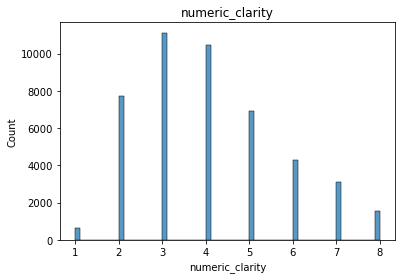

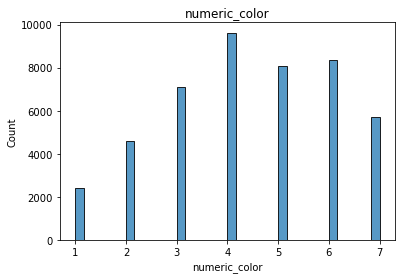

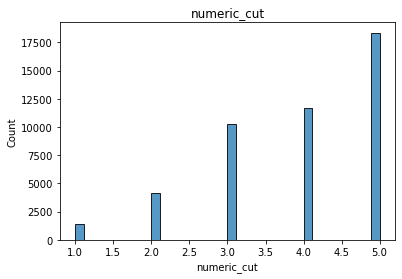

In [9]:
# sns.pairplot(df[["price", ], palette='rainbow')
rows = ["numeric_clarity", "numeric_color", "numeric_cut"]

for row in rows:
    sns.histplot(x = df[row]).set_title(row)
    plt.show()

<AxesSubplot:>

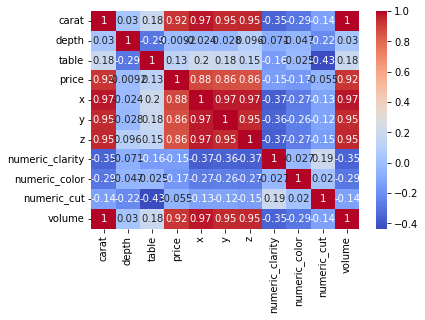

In [10]:
sns.heatmap(
    df.corr(),
    annot = True,
    cmap = 'coolwarm'
)

## Data cleaning

Removed x, y, z, depth, and table, as (in a way) they are all related to carat. Might try to use this for Linear Regression

<AxesSubplot:>

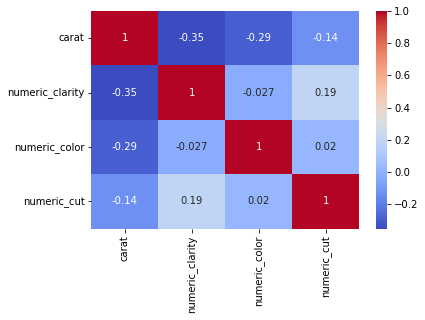

In [15]:
df_clean = df[['carat', 'numeric_clarity', 'numeric_color', 'numeric_cut']]

sns.heatmap(
    df_clean.corr(),
    annot = True,
    cmap = 'coolwarm'
)

In [12]:
df_clean.head()

,carat,price,numeric_clarity,numeric_color,numeric_cut
0,0.83,3495,4,5,4
1,1.25,5027,3,3,4
2,0.41,791,3,7,4
3,0.31,489,4,3,2
4,0.30,844,8,4,5


In [13]:
features = [a for a in df.columns if not a in ['price', 'color', 'cut', 'clarity']]
featuresDfClean = [a for a in df_clean.columns if not a in ['price', 'color', 'cut', 'clarity']]

# Get all features that are relevant to our analysis
print(features)
print(featuresDfClean)

['carat', 'depth', 'table', 'x', 'y', 'z', 'numeric_clarity', 'numeric_color', 'numeric_cut', 'volume']
['carat', 'numeric_clarity', 'numeric_color', 'numeric_cut']


### Split the data for training

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

targets = df_clean[featuresDfClean]
result = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    targets,
    result,
    test_size = 0.3,
    random_state = 1774
)

### Normalize the data

In [18]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Apply PCA

In [19]:
from sklearn.decomposition import PCA

pca = PCA(.95)

pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

## Train the model

In [20]:
lm = LinearRegression()
lm.fit(
    X_train,
    y_train
)

LinearRegression()

## Test and evaluate the model

In [21]:
predictions = lm.predict(X_test)

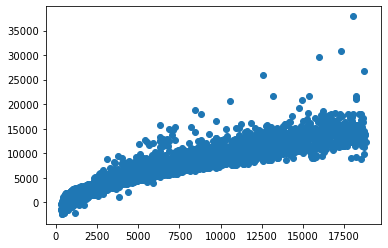

In [22]:
plt.scatter(y_test, predictions)

In [23]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(
    "MAE:", mae,
    "\nMSE:", mse,
    "\nRMSE:", rmse
)

MAE: 858.9926316405132 
MSE: 1547713.3075669934 
RMSE: 1244.071263058107


<AxesSubplot:xlabel='price', ylabel='Count'>

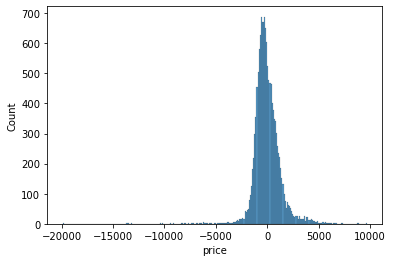

In [24]:
sns.histplot(y_test - predictions)

In [25]:
predictions

array([14377.7276911 ,  7843.5885209 ,  4011.83073355, ...,
        3453.9142647 ,  9625.86596499,  1254.39041028])

In [26]:
y_test

24406    15540
7276      6694
1238      3041
15268     3176
5807       818
         ...  
19555     7295
25771      734
21585     2723
32817     9232
36261      743
Name: price, Length: 13755, dtype: int64

In [27]:
lm.score(X_test, y_test)

0.9016593874989587